## Clustering

El clustering es la tarea de dividir el conjunto de datos en grupos,llamados clusters. El objetivo es dividir los datos de tal manera que los puntos dentro de un solo clúster sean muy similares y los puntos en diferentes clústeres sean diferentes. De forma similar a los algoritmos de clasificación, los algoritmos clustering asignan (o predicen) un número a cada punto de datos, indicando a qué grupo pertenece un punto en particular.

### k-Means Clustering

k-means clustering es uno de los algoritmos de agrupamiento más simples y más utilizados. Intenta encontrar centros de clúster que sean representativos de ciertas regiones de los datos. El algoritmo se alterna entre dos pasos: asignar cada punto de datos al centro de clúster más cercano y luego establecer cada centro de clúster como la media de los puntos de datos que se le asignan. El algoritmo finaliza cuando la asignación de instancias a clusters ya no cambia.

In [2]:
%matplotlib inline
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

In [3]:
from matplotlib.colors import  colorConverter, ListedColormap
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

def dibuja_dispersion_discreta(x1, x2, y=None, marcadores=None, s=10, ax=None,
                     etiquetas=None, relleno=.2, alfa=1, c=None, anchobordemarcador=None):
    """Adaptacion de la funcion matplotlib.pyplot.scatter a dibujar clases o  clusters"""
    
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unico_y = np.unique(y)

    if marcadores is None:
        marcadores= ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(marcadores) == 1:
        marcadores = marcadores * len(unico_y)

    if etiquetas is None:
        etiquetas = unico_y

    # lineas en el sentido de matplotlib
    lineas = []

    actual_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unico_y, actual_cycler())):
        mascara = y == yy
        # if c is ninguno, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # bordes claros para marcadores oscuros
        if np.mean(colorConverter.to_rgb(color)) < .4:
            colorbordemarcador = "grey"
        else:
            colorbordemarcador = "black"

        lineas.append(ax.plot(x1[mascara], x2[mascara], marcadores[i], markersize=s,
                             label=etiquetas[i], alpha=alfa, c=color,
                             markeredgewidth=anchobordemarcador,
                             markeredgecolor=colorbordemarcador)[0])

    if relleno != 0:
        pad1 = x1.std() * relleno
        pad2 = x2.std() * relleno
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lineas

In [15]:
def dibuja_clasificacion_2d(clasificador, X, relleno=False, ax=None, eps=None, alfa=1, cm=cm3):
    # multiclase
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    valores_decision = clasificador.predict(X_grid)
    ax.imshow(valores_decision.reshape(X1.shape), extent=(x_min, x_max,
                        y_min, y_max), aspect='auto', origin='lower', alpha=alfa, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [13]:
def dibuja_algoritmos_kmeans():
    X, y = make_blobs(random_state=1)
    with mpl.rc_context(rc={'axes.prop_cycle': cycler('color', ['#0000aa',
                                                                '#ff2020',
                                                                '#50ff50'])}):
        fig, axes = plt.subplots(3, 3, figsize=(10, 8), subplot_kw={'xticks': (), 'yticks': ()})
        axes = axes.ravel()
        axes[0].set_title("Entrada de datos")
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], ax=axes[0], marcadores=['o'], c='w')
        axes[1].set_title("Inicializacion")
        inicio= X[:3, :]
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], ax=axes[1], marcadores=['o'], c='w')
        dibuja_dispersion_discreta(inicio[:, 0], inicio[:, 1], [0, 1, 2], ax=axes[1], marcadores=['^'], anchobordemarcador=2)
        axes[2].set_title("Asignamos puntos (1)")
        km = KMeans(n_clusters=3, init=inicio, max_iter=1, n_init=1).fit(X)
        centros = km.cluster_centers_
        # necesitamos calcular las etiquetas. 
        etiquetas = np.argmin(pairwise_distances(inicio, X), axis=0)
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], etiquetas, marcadores=['o'],
                         ax=axes[2])
        dibuja_dispersion_discreta(inicio[:, 0], inicio[:, 1], [0, 1, 2], ax=axes[2], marcadores=['^'], anchobordemarcador=2)

        axes[3].set_title("Recalculamos los centros (1)")
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], etiquetas, marcadores=['o'],
                         ax=axes[3])
        dibuja_dispersion_discreta(centros[:, 0], centros[:, 1], [0, 1, 2], ax=axes[3], marcadores=['^'], anchobordemarcador=2)

        axes[4].set_title("Reasignar puntos (2)")
        km = KMeans(n_clusters=3, init=inicio, max_iter=1, n_init=1).fit(X)
        etiquetas = km.labels_
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], etiquetas, marcadores=['o'],
                         ax=axes[4])
        dibuja_dispersion_discreta(centros[:, 0], centros[:, 1], [0, 1, 2], ax=axes[4], marcadores=['^'], anchobordemarcador=2)

        km = KMeans(n_clusters=3, init=inicio, max_iter=2, n_init=1).fit(X)
        axes[5].set_title("Recalculamos el centro (2)")
        centros = km.cluster_centers_
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], etiquetas, marcadores=['o'],
                         ax=axes[5])
        dibuja_dispersion_discreta(centros[:, 0], centros[:, 1], [0, 1, 2], ax=axes[5], marcadores=['^'], anchobordemarcador=2)

        axes[6].set_title("Reasignamos puntos (3)")
        etiquetas = km.labels_
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], etiquetas, marcadores=['o'],
                         ax=axes[6])
        marcadores= dibuja_dispersion_discreta(centros[:, 0], centros[:, 1], [0, 1, 2], ax=axes[6], marcadores=['^'], anchobordemarcador=2)

        axes[7].set_title("Recalculamos centros (3)")
        km = KMeans(n_clusters=3, init=inicio, max_iter=3, n_init=1).fit(X)
        centros = km.cluster_centers_
        dibuja_dispersion_discreta(X[:, 0], X[:, 1], etiquetas, marcadores=['o'],
                         ax=axes[7])
        dibuja_dispersion_discreta(centros[:, 0], centros[:, 1], [0, 1, 2], ax=axes[7], marcadores=['^'], anchobordemarcador=2)
        axes[8].set_axis_off()
        axes[8].legend(marcadores, ["Cluster 0", "Cluster 1", "Cluster 2"], loc='best')

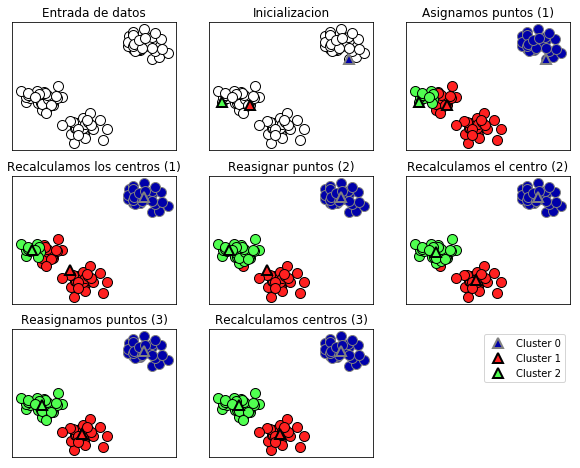

In [14]:
dibuja_algoritmos_kmeans()

Los centros de clustering se muestran como triángulos, mientras que los puntos de datos se muestran como círculos. Los colores indican la pertenencia al grupo. Especificamos que estamos buscando tres clústeres, por lo que el algoritmo se inicializó al declarar tres puntos de datos aleatoriamente como centros de clúster. Entonces el algoritmo iterativo comienza. En primer lugar, cada punto de datos se asigna al centro del clúster más cercano. A continuación, los centros del clúster se actualizan para ser la media de los puntos asignados. Entonces el proceso se repite dos veces más. Después de la tercera iteración, la asignación de puntos a los centros del clúster permaneció sin cambios, por lo que el algoritmo se detiene.

Dados los nuevos puntos de datos, k-means asignará cada uno al centro de clúster más cercano. El siguiente ejemplo muestra las fronteras  de los centros de clustering  que se aprendieron en el gráfico anterior:

In [16]:
def dibuja_frontera_kmeans():
    X, y = make_blobs(random_state=1)
    inicio = X[:3, :]
    km = KMeans(n_clusters=3, init=inicio, max_iter=2, n_init=1).fit(X)
    dibuja_dispersion_discreta(X[:, 0], X[:, 1], km.labels_, marcadores=['o'])
    dibuja_dispersion_discreta(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2], marcadores=['^'], anchobordemarcador=2)
    dibuja_clasificacion_2d(km, X, cm=cm3, alfa=.4)


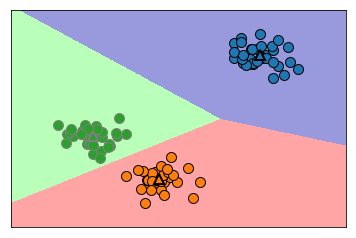

In [17]:
dibuja_frontera_kmeans()

La aplicación de k-means con scikit-learn es bastante sencilla. Aquí, lo aplicamos a los datos artificiales que usamos para los gráficos anteriores. Instalamos la clase `KMeans` y establecemos el número de clusters que estamos buscando. Luego llamamos al método `fit` con los datos:

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generamos datos superficiales con dos dimensiones
X, y = make_blobs(random_state=1)

# construimos el modelo de clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
print("Miembros de los clustering:\n{}".format(kmeans.labels_))

Miembros de los clustering:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


Como pedimos tres clusters, los clusters están numerados del `0` al `2`.

También se puede asignar etiquetas de clúster a nuevos puntos, utilizando el método `predict`. Cada nuevo punto se asigna al centro de clúster más cercano al predecir, pero el modelo existente no se cambia. La ejecución de `predict `en el conjunto de entrenamiento resulta  el mismo resultado que `labels_`:

In [20]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


El clustering es similar a la clasificación, ya que cada elemento recibe una etiqueta. Sin embargo, no existe una verdad fundamental y por consiguiente, las etiquetas en sí mismas no tienen un significado a priori. Es posible que el grupo 3 encontrado por el algoritmo contenga solo las caras de una persona. Sin embargo, solo puedes saberlo después de mirar las imágenes  y el número 3 es arbitrario. La única información que el algoritmo le brinda es que todas las caras etiquetadas como 3 son similares.

Para el clustering  que acabamos de calcular en el conjunto de datos bidimensional, eso significa que no deberíamos asignar ningún significado al hecho de que un grupo se etiquetó como `0` y otro como etiquetado `1`. Ejecutar el algoritmo de nuevo podría dar como resultado una numeración diferente de clusters debido a la naturaleza aleatoria de la inicialización.

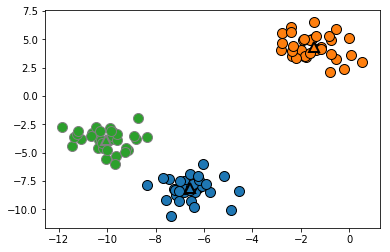

In [22]:
# Las asignaciones de clúster y los centros de clúster encontrados por k-means con tres clusters

dibuja_dispersion_discreta(X[:, 0], X[:, 1], kmeans.labels_, marcadores='o')
dibuja_dispersion_discreta( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], marcadores='^', anchobordemarcador=2)

También podemos usar más o menos centros de clusters:

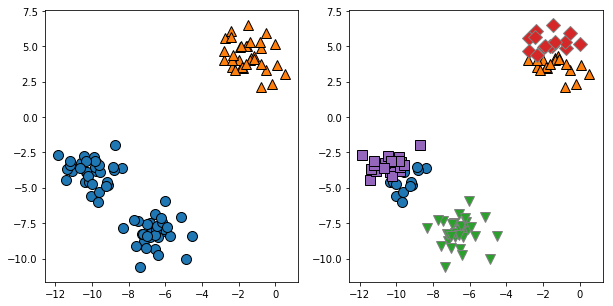

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# usando dos centros de clusters:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
asignamientos = kmeans.labels_
dibuja_dispersion_discreta(X[:, 0], X[:, 1], asignamientos, ax=axes[0])

# usando cinco centros de clustering:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
asignamientos = kmeans.labels_
dibuja_dispersion_discreta(X[:, 0], X[:, 1], asignamientos, ax=axes[1])

### Casos de falla de k-means

Incluso si conoce el número "correcto" de clústeres para un determinado conjunto de datos, k-means podría no ser capaz de recuperarlos. Cada grupo se define únicamente por su centro, lo que significa que cada grupo tiene una forma convexa. Como resultado de esto, k-means solo puede capturar formas relativamente simples. k-means también asume que todos los clusters tienen el mismo "diámetro" en algún sentido; siempre se dibuja la frontera entre los clusters para estar exactamente en el medio entre los centros del clúster. Eso a veces puede llevar a resultados sorprendentes.

Text(0,0.5,'Caracteristica 1')

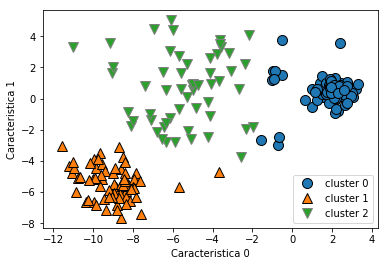

In [24]:
X_c, y_c = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_c)
dibuja_dispersion_discreta(X_c[:, 0], X_c[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

Se podría haber esperado que la región densa en la parte inferior izquierda sea el primer grupo, la región densa en la parte superior derecha sea la segunda  y la región menos densa en el centro es la tercera. En cambio, tanto el `cluster 0` como el `cluster 1` tienen algunos puntos que están muy lejos de todos los demás puntos de estos clusters que "alcanzan" hacia el centro.

k-means también asume que todas las direcciones son igualmente importantes para cada grupo. La siguiente gráfica muestra un conjunto de datos bidimensionales donde hay tres partes claramente separadas en los datos. Sin embargo, estos grupos están estirados hacia la diagonal. Como k-means solo considera la distancia al centro de clúster más cercano, no puede manejar este tipo de datos:

Text(0,0.5,'Caracteristica 1')

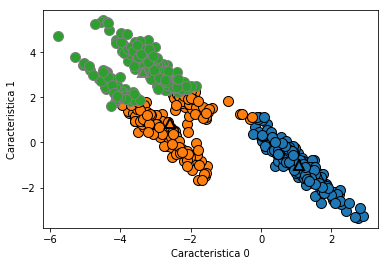

In [28]:
# generar algunos datos de clúster aleatorios
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transformar los datos a extender
transformacion = rng.normal(size=(2, 2))
X = np.dot(X, transformacion)

# agrupamos  los datos en tres clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#  dibujamos las asignaciones de clúster y los centros de clúster
dibuja_dispersion_discreta(X[:, 0], X[:, 1], kmeans.labels_, marcadores='o')
dibuja_dispersion_discreta( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], 
                           marcadores='^', anchobordemarcador=2)
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

k-means  funciona mal si los clusters tienen formas más complejas, como los datos `two_moons` que encontramos en otras notas:

Text(0,0.5,'Caracteristica 1')

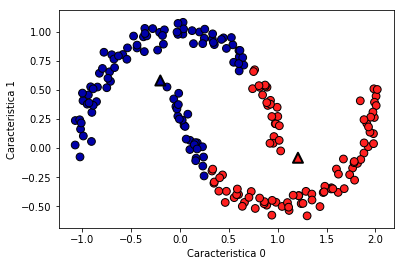

In [29]:
# generamos datos artificiales  two_moons con menor ruido
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# clustering en los datos en dos  clusteres
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#  dibujamos las asignaciones de clúster y los centros de clúster
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap= cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[cm2(0), cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")

## Cuantización de vectores, o  k-means como descomposición

Aunque k-means es un algoritmo de agrupación, hay paralelismos interesantes entre k-means y los métodos de descomposición como PCA y NMF. Como se conoce PCA trata de encontrar direcciones de varianza máxima en los datos, mientras que NMF intenta encontrar componentes aditivos, que a menudo corresponden a "extremos" o "partes" de los datos. Ambos métodos intentaron expresar los puntos de datos como una suma sobre algunos componentes. k-means, por otro lado, intenta representar cada punto de datos usando un centro clustering. Puedes pensar en eso ya que cada punto se representa usando solo un componente, que es dado por el centro del grupo. Esta vista de k-means como un método de descomposición, donde cada punto se representa usando un solo componente, se denomina cuantización vectorial.

Hagamos una comparación lado a lado de PCA, NMF y k-means, mostrando los componentes extraídos, así como las reconstrucciones de las caras del conjunto de prueba utilizando 100 componentes. Para k-means, la reconstrucción es el centro de clúster más cercano que se encuentra en el conjunto de entrenamiento:


In [30]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
%matplotlib inline

personas= fetch_lfw_people(min_faces_per_person=20, resize=0.7)
imagen_shape = personas.images[0].shape

In [31]:
mascara = np.zeros(personas.target.shape, dtype=np.bool)
for objetivo in np.unique(personas.target):
    mascara[np.where(personas.target == objetivo)[0][:50]] = 1

X_personas = personas.data[mascara]
y_personas = personas.target[mascara]

# la escala debe ir entre 0 y 1 en lugar de  0 y 255 
# para menor estabilidad numerica
X_personas = X_personas / 255.

In [33]:
from sklearn.decomposition import NMF, PCA

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_personas,
                                        y_personas, stratify=y_personas, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_entrenamiento)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_entrenamiento)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_entrenamiento)

X_reconstruida_pca = pca.inverse_transform(pca.transform(X_prueba))
X_reconstruida_kmeans = kmeans.cluster_centers_[kmeans.predict(X_prueba)]
X_reconstruida_nmf = np.dot(nmf.transform(X_prueba), nmf.components_)

Text(0,0.5,'nmf')

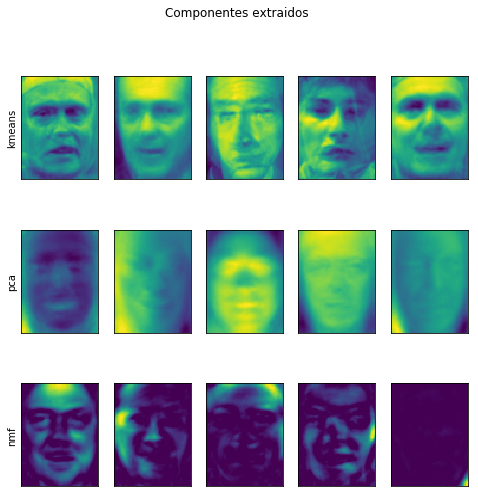

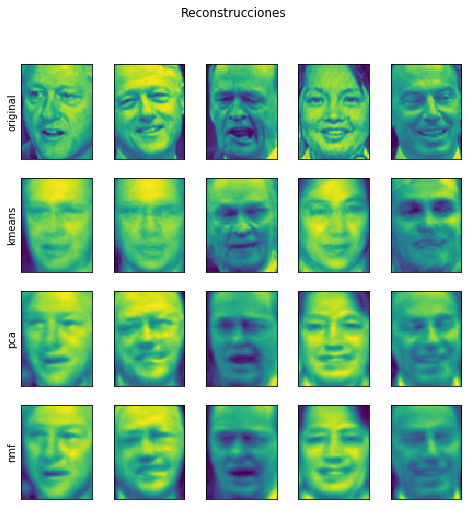

In [35]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Componentes extraidos")

for ax, comp_kmeans, comp_pca, comp_nmf in zip( axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(imagen_shape))
    ax[1].imshow(comp_pca.reshape(imagen_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(imagen_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(8, 8))
fig.suptitle("Reconstrucciones")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_prueba, X_reconstruida_kmeans,
                                                  X_reconstruida_pca,X_reconstruida_nmf):
    ax[0].imshow(orig.reshape(imagen_shape))
    ax[1].imshow(rec_kmeans.reshape(imagen_shape))
    ax[2].imshow(rec_pca.reshape(imagen_shape))
    ax[3].imshow(rec_nmf.reshape(imagen_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Un aspecto interesante de la cuantificación vectorial utilizando k-means es que podemos usar muchos más clusters que las dimensiones de entrada para codificar nuestros datos. Regresemos a los datos `two_moons`. Usando PCA o NMF, no hay mucho que podamos hacer con estos datos, ya que solo existen en dos dimensiones. Reducirlo a una dimensión con PCA o NMF destruiría por completo la estructura de los datos. Pero podemos encontrar una representación más interesante con k-means, mediante el uso de más centros de clusters:

Miembros de los clustering:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


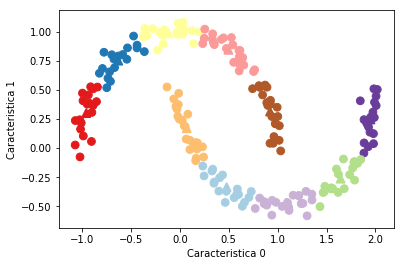

In [36]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')

plt.xlabel("Caracteristica 0")
plt.ylabel("Caracteristica 1")
print("Miembros de los clustering:\n{}".format(y_pred))

Usamos 10 centros de clúster, lo que significa que a cada punto se le asigna un número entre `0` y `9`.  Podemos ver esto como los datos que se representan usando `10` componentes (es decir, tenemos `10` nuevas características), con todas las características siendo `0`, aparte desde el que representa el centro del clúster al que está asignado el punto. Usando esta representación de `10` dimensiones, ahora sería posible separar las dos dimensiones  de la media luna con un modelo lineal, lo que no hubiera sido posible con las dos característic originales. 
También es posible obtener una representación aún más expresiva de los datos mediante el uso de las distancias a cada uno de los centros del clúster como características. Esto puede llevarse a cabo usando el método `transform` de `kmeans`:

In [37]:
distancia_caracteristica = kmeans.transform(X)
print("Dimension de las distancia caracteristica : {}".format(distancia_caracteristica.shape))
print("Distancia caracteristica:\n{}".format(distancia_caracteristica))

Dimension de las distancia caracteristica : (200, 10)
Distancia caracteristica:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k-means es un algoritmo muy popular para el clustering, no solo porque es relativamente fácil de comprender e implementar, sino también porque se ejecuta con relativa rapidez. kmeans escala fácilmente grandes conjuntos de datos y scikit-learn incluso incluye una variante más escalable en la clase `MiniBatchKMeans`, que puede manejar conjuntos de datos muy grandes.

Uno de los inconvenientes de k-means es que se basa en una inicialización aleatoria, lo que significa que el resultado del algoritmo depende de una semilla aleatoria. De forma predeterminada, scikitlearn ejecuta el algoritmo 10 veces con 10 inicializaciones aleatorias diferentes y devuelve el mejor resultado. Otras desventajas de los k-means son las suposiciones relativamente restrictivas hechas sobre la forma de los clusters y el requisito de especificar el número de clusters que se está buscando (que podrían no conocerse en una aplicación del mundo real).


Otras desventajas de los k-means son las suposiciones relativamente restrictivas hechas sobre la forma de los clusters, y el requisito de especificar el número de clusters que está buscando (que podrían no conocerse en una aplicación del mundo real).